In [ ]:
import pandas as pd
import warnings
import statsmodels.api as sm
import os
import numpy as np
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pylab as plt
from IPython.core.interactiveshell import InteractiveShell

In [ ]:
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = 'all'

%reload_ext autoreload
%autoreload 2
%matplotlib inline

def set_seed(seed=42):
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
set_seed()

sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
plt.style.use('fivethirtyeight')
pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 30)

plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.5
plt.rcParams["grid.linestyle"] = '--'
plt.rcParams["font.family"] = "monospace"
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['figure.frameon'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.linewidth'] = 1.5

print("setup-complete!")

setup-complete!


In [ ]:
data = pd.read_csv("/content/House-Price-Prediction-clean.csv")
del data["Id"]

X = data.drop(columns=["SalePrice"])
y = data["SalePrice"]

In [ ]:
data.head().style.background_gradient(cmap="Blues")

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,150,856,856,854,1710,1,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,284,1262,1262,0,1262,0,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,434,920,920,866,1786,1,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,540,756,961,756,1717,1,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,490,1145,1145,1053,2198,1,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
data.tail().style.background_gradient(cmap="Blues")

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1455,60,7917,6,5,1999,2000,0,953,953,953,694,1647,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,790,589,1542,2073,0,2073,1,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,275,877,1152,1188,1152,2340,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,49,0,1078,1078,0,1078,1,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,2010,142125
1459,20,9937,5,6,1965,1965,830,136,1256,1256,0,1256,1,1,1,3,1,6,0,1,276,736,68,0,0,0,0,0,6,2008,147500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1460 non-null   int64
 1   LotArea        1460 non-null   int64
 2   OverallQual    1460 non-null   int64
 3   OverallCond    1460 non-null   int64
 4   YearBuilt      1460 non-null   int64
 5   YearRemodAdd   1460 non-null   int64
 6   BsmtFinSF1     1460 non-null   int64
 7   BsmtUnfSF      1460 non-null   int64
 8   TotalBsmtSF    1460 non-null   int64
 9   1stFlrSF       1460 non-null   int64
 10  2ndFlrSF       1460 non-null   int64
 11  GrLivArea      1460 non-null   int64
 12  BsmtFullBath   1460 non-null   int64
 13  FullBath       1460 non-null   int64
 14  HalfBath       1460 non-null   int64
 15  BedroomAbvGr   1460 non-null   int64
 16  KitchenAbvGr   1460 non-null   int64
 17  TotRmsAbvGrd   1460 non-null   int64
 18  Fireplaces     1460 non-null   int64
 19  Garage

In [ ]:
missing_value_count = data.isnull().sum()

missing_value_count.to_frame().T.style.background_gradient(cmap="Blues")

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
(data.describe(include=[np.number],
               percentiles=[.25, .5, .75])
               .astype("int64")
               .style.background_gradient(cmap="Blues"))

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
mean,56,10516,6,5,1971,1984,443,567,1057,1162,346,1515,0,1,0,2,1,6,0,1,472,94,46,21,3,15,2,43,6,2007,180921
std,42,9981,1,1,30,20,456,441,438,386,436,525,0,0,0,0,0,1,0,0,213,125,66,61,29,55,40,496,2,1,79442
min,20,1300,1,1,1872,1950,0,0,0,334,0,334,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,2006,34900
25%,20,7553,5,5,1954,1967,0,223,795,882,0,1129,0,1,0,2,1,5,0,1,334,0,0,0,0,0,0,0,5,2007,129975
50%,50,9478,6,5,1973,1994,383,477,991,1087,0,1464,0,2,0,3,1,6,1,2,480,0,25,0,0,0,0,0,6,2008,163000
75%,70,11601,7,6,2000,2004,712,808,1298,1391,728,1776,1,2,1,3,1,7,1,2,576,168,68,0,0,0,0,0,8,2009,214000
max,190,215245,10,9,2010,2010,5644,2336,6110,4692,2065,5642,3,3,2,8,3,14,3,4,1418,857,547,552,508,480,738,15500,12,2010,755000


In [ ]:
(data.corr()["SalePrice"]
     .sort_values(ascending=False)
     .to_frame().T
     .style.background_gradient(cmap="Blues"))

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Fireplaces,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,ScreenPorch,PoolArea,MoSold,3SsnPorch,MiscVal,YrSold,OverallCond,MSSubClass,EnclosedPorch,KitchenAbvGr
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101,0.466929,0.386420,0.324413,0.319334,0.315856,0.284108,0.263843,0.227122,0.214479,0.168213,0.111447,0.092404,0.046432,0.044584,-0.021190,-0.028923,-0.077856,-0.084284,-0.128578,-0.135907


In [ ]:
X_mutual = data.drop(columns=["SalePrice"]).reset_index().copy()
y_mutual = data["SalePrice"]

del X_mutual["index"]

discrete_features = X_mutual.dtypes == int

In [ ]:
def make_mi_score(X_mutual, y_mutual, discrete_features):
    mi_scores = mutual_info_regression(X_mutual, y_mutual, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_mutual.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_score(X_mutual, y_mutual, discrete_features)
mi_scores.to_frame().T

,OverallQual,GarageArea,GrLivArea,YearBuilt,TotalBsmtSF,LotArea,GarageCars,MSSubClass,1stFlrSF,YearRemodAdd,FullBath,TotRmsAbvGrd,OpenPorchSF,2ndFlrSF,Fireplaces,BsmtFinSF1,BsmtUnfSF,OverallCond,WoodDeckSF,HalfBath,BedroomAbvGr,EnclosedPorch,KitchenAbvGr,ScreenPorch,BsmtFullBath,YrSold,3SsnPorch,PoolArea,MiscVal,MoSold
MI Scores,0.568624,0.496543,0.432761,0.41003,0.397917,0.392961,0.360005,0.288794,0.279445,0.276771,0.264053,0.223458,0.191916,0.170135,0.161717,0.157985,0.118683,0.116145,0.100286,0.097709,0.066708,0.026947,0.021463,0.021415,0.017385,0.011667,0.000855,2.220446e-16,0.0,0.0


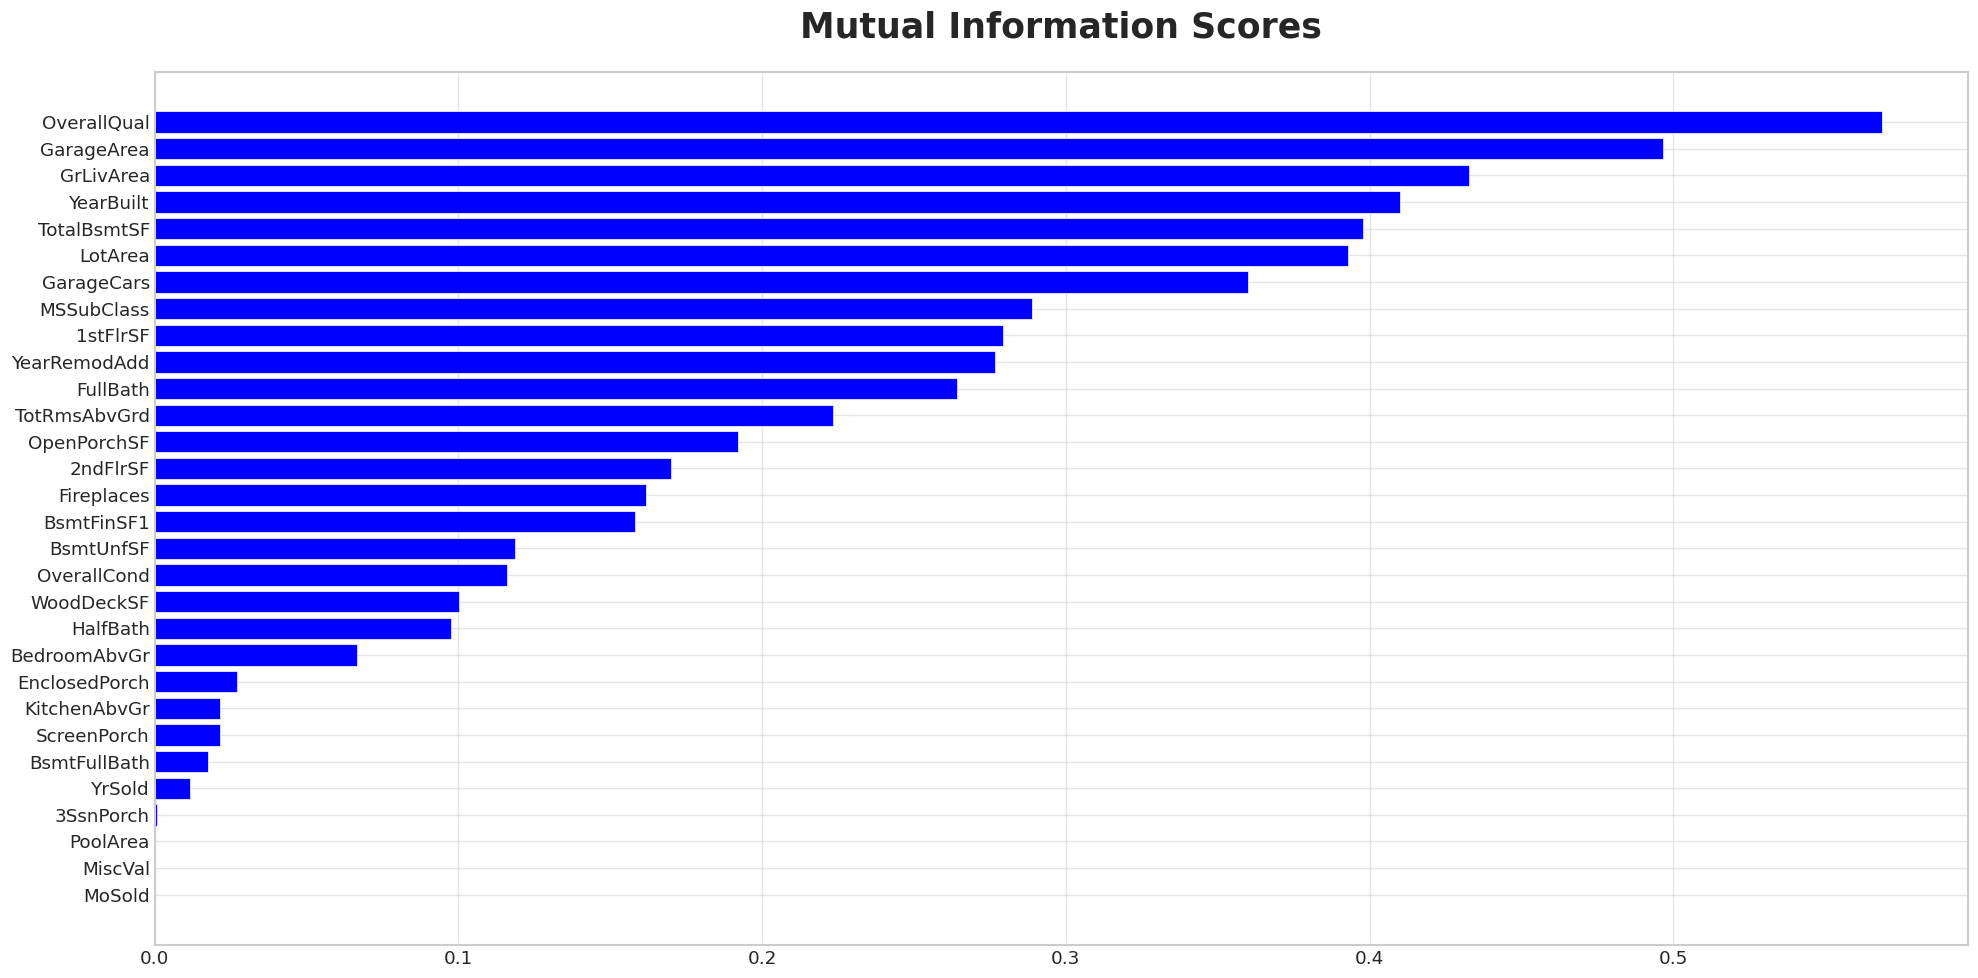

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.figure(figsize=(20, 10))
    plt.barh(width, scores, color="blue")
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores",
              weight="bold",
              fontsize=25, pad=25)

plot_mi_scores(mi_scores)

In [ ]:
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     201.6
Date:                Wed, 24 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:48:57   Log-Likelihood:                -17336.
No. Observations:                1460   AIC:                         3.473e+04
Df Residuals:                    1429   BIC:                         3.490e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.242e+05   1.43e+06      0.368      0.713   -2.27e+06    3.32e+06
MSSubClass     -161.6448     26.404     -6.122      0.000    -213.439    -109.850
LotArea           0.3988      0.102      3.928      0.000       0.200       0.598
OverallQual    1.789e+04   1194.173     14.977      0.000    1.55e+04    2.02e+04
OverallCond    4465.1850   1029.552      4.337      0.000    2445.591    6484.780
YearBuilt       347.5884     61.129      5.686      0.000     227.676     467.501
YearRemodAdd    138.7624     66.254      2.094      0.036       8.797     268.728
BsmtFinSF1       14.5057      6.084      2.384      0.017       2.571      26.440
BsmtUnfSF         2.9839      6.191      0.482      0.630      -9.161      15.129
TotalBsmtSF       7.6320      7.079      1.078      0.281      -6.255      21.519
1stFlrSF         24.8113     20.315      1.221      0.222     -15.039      64.662
2ndFlrSF         24.8872     19.997      1.245      0.213     -14.339      64.113
GrLivArea        25.7528     19.882      1.295      0.195     -13.248      64.753
BsmtFullBath   8066.2421   2512.597      3.210      0.001    3137.469     1.3e+04
FullBath       3456.9489   2833.559      1.220      0.223   -2101.432    9015.330
HalfBath      -1361.8236   2686.756     -0.507      0.612   -6632.232    3908.585
BedroomAbvGr  -1.043e+04   1702.497     -6.128      0.000   -1.38e+04   -7092.451
KitchenAbvGr  -1.296e+04   5248.240     -2.470      0.014   -2.33e+04   -2665.892
TotRmsAbvGrd   5118.9755   1248.146      4.101      0.000    2670.581    7567.370
Fireplaces     3625.2187   1781.440      2.035      0.042     130.701    7119.736
GarageCars     1.069e+04   2880.161      3.712      0.000    5040.123    1.63e+04
GarageArea        1.2735      9.783      0.130      0.896     -17.916      20.463
WoodDeckSF       26.6081      8.031      3.313      0.001      10.854      42.362
OpenPorchSF      -5.6206     15.280     -0.368      0.713     -35.595      24.354
EnclosedPorch     8.8776     17.016      0.522      0.602     -24.501      42.256
3SsnPorch        19.5148     31.648      0.617      0.538     -42.567      81.597
ScreenPorch      58.0491     17.345      3.347      0.001      24.024      92.074
PoolArea        -42.6445     23.765     -1.794      0.073     -89.262       3.973
MiscVal          -0.9208      1.872     -0.492      0.623      -4.593       2.752
MoSold         -109.0809    347.849     -0.314      0.754    -791.429     573.268
YrSold         -771.0038    708.832     -1.088      0.277   -2161.467     619.459
==============================================================================
Omnibus:                      575.901   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           104821.921
Skew:                          -0.681   Prob(JB):         

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [ ]:
net = LinearRegression()

In [ ]:
net.fit(X_train, y_train)

LinearRegression()

In [ ]:
test_data = net.predict(X_test)
train_data = net.predict(X_train)

In [ ]:
test_r2_score = r2_score(y_test, test_data)
print(f'Test R2_score: {test_r2_score:.2f}')

test_mse = mean_absolute_error(y_test, test_data)
print(f'Test MSE : {test_mse:.2f}')

test_RMSE = mean_squared_error(y_test, test_data)
print(f'Test RMSE : {test_RMSE:.2f}')

Test R2_score: 0.82
Test MSE : 22523.56
Test RMSE : 1260986886.41


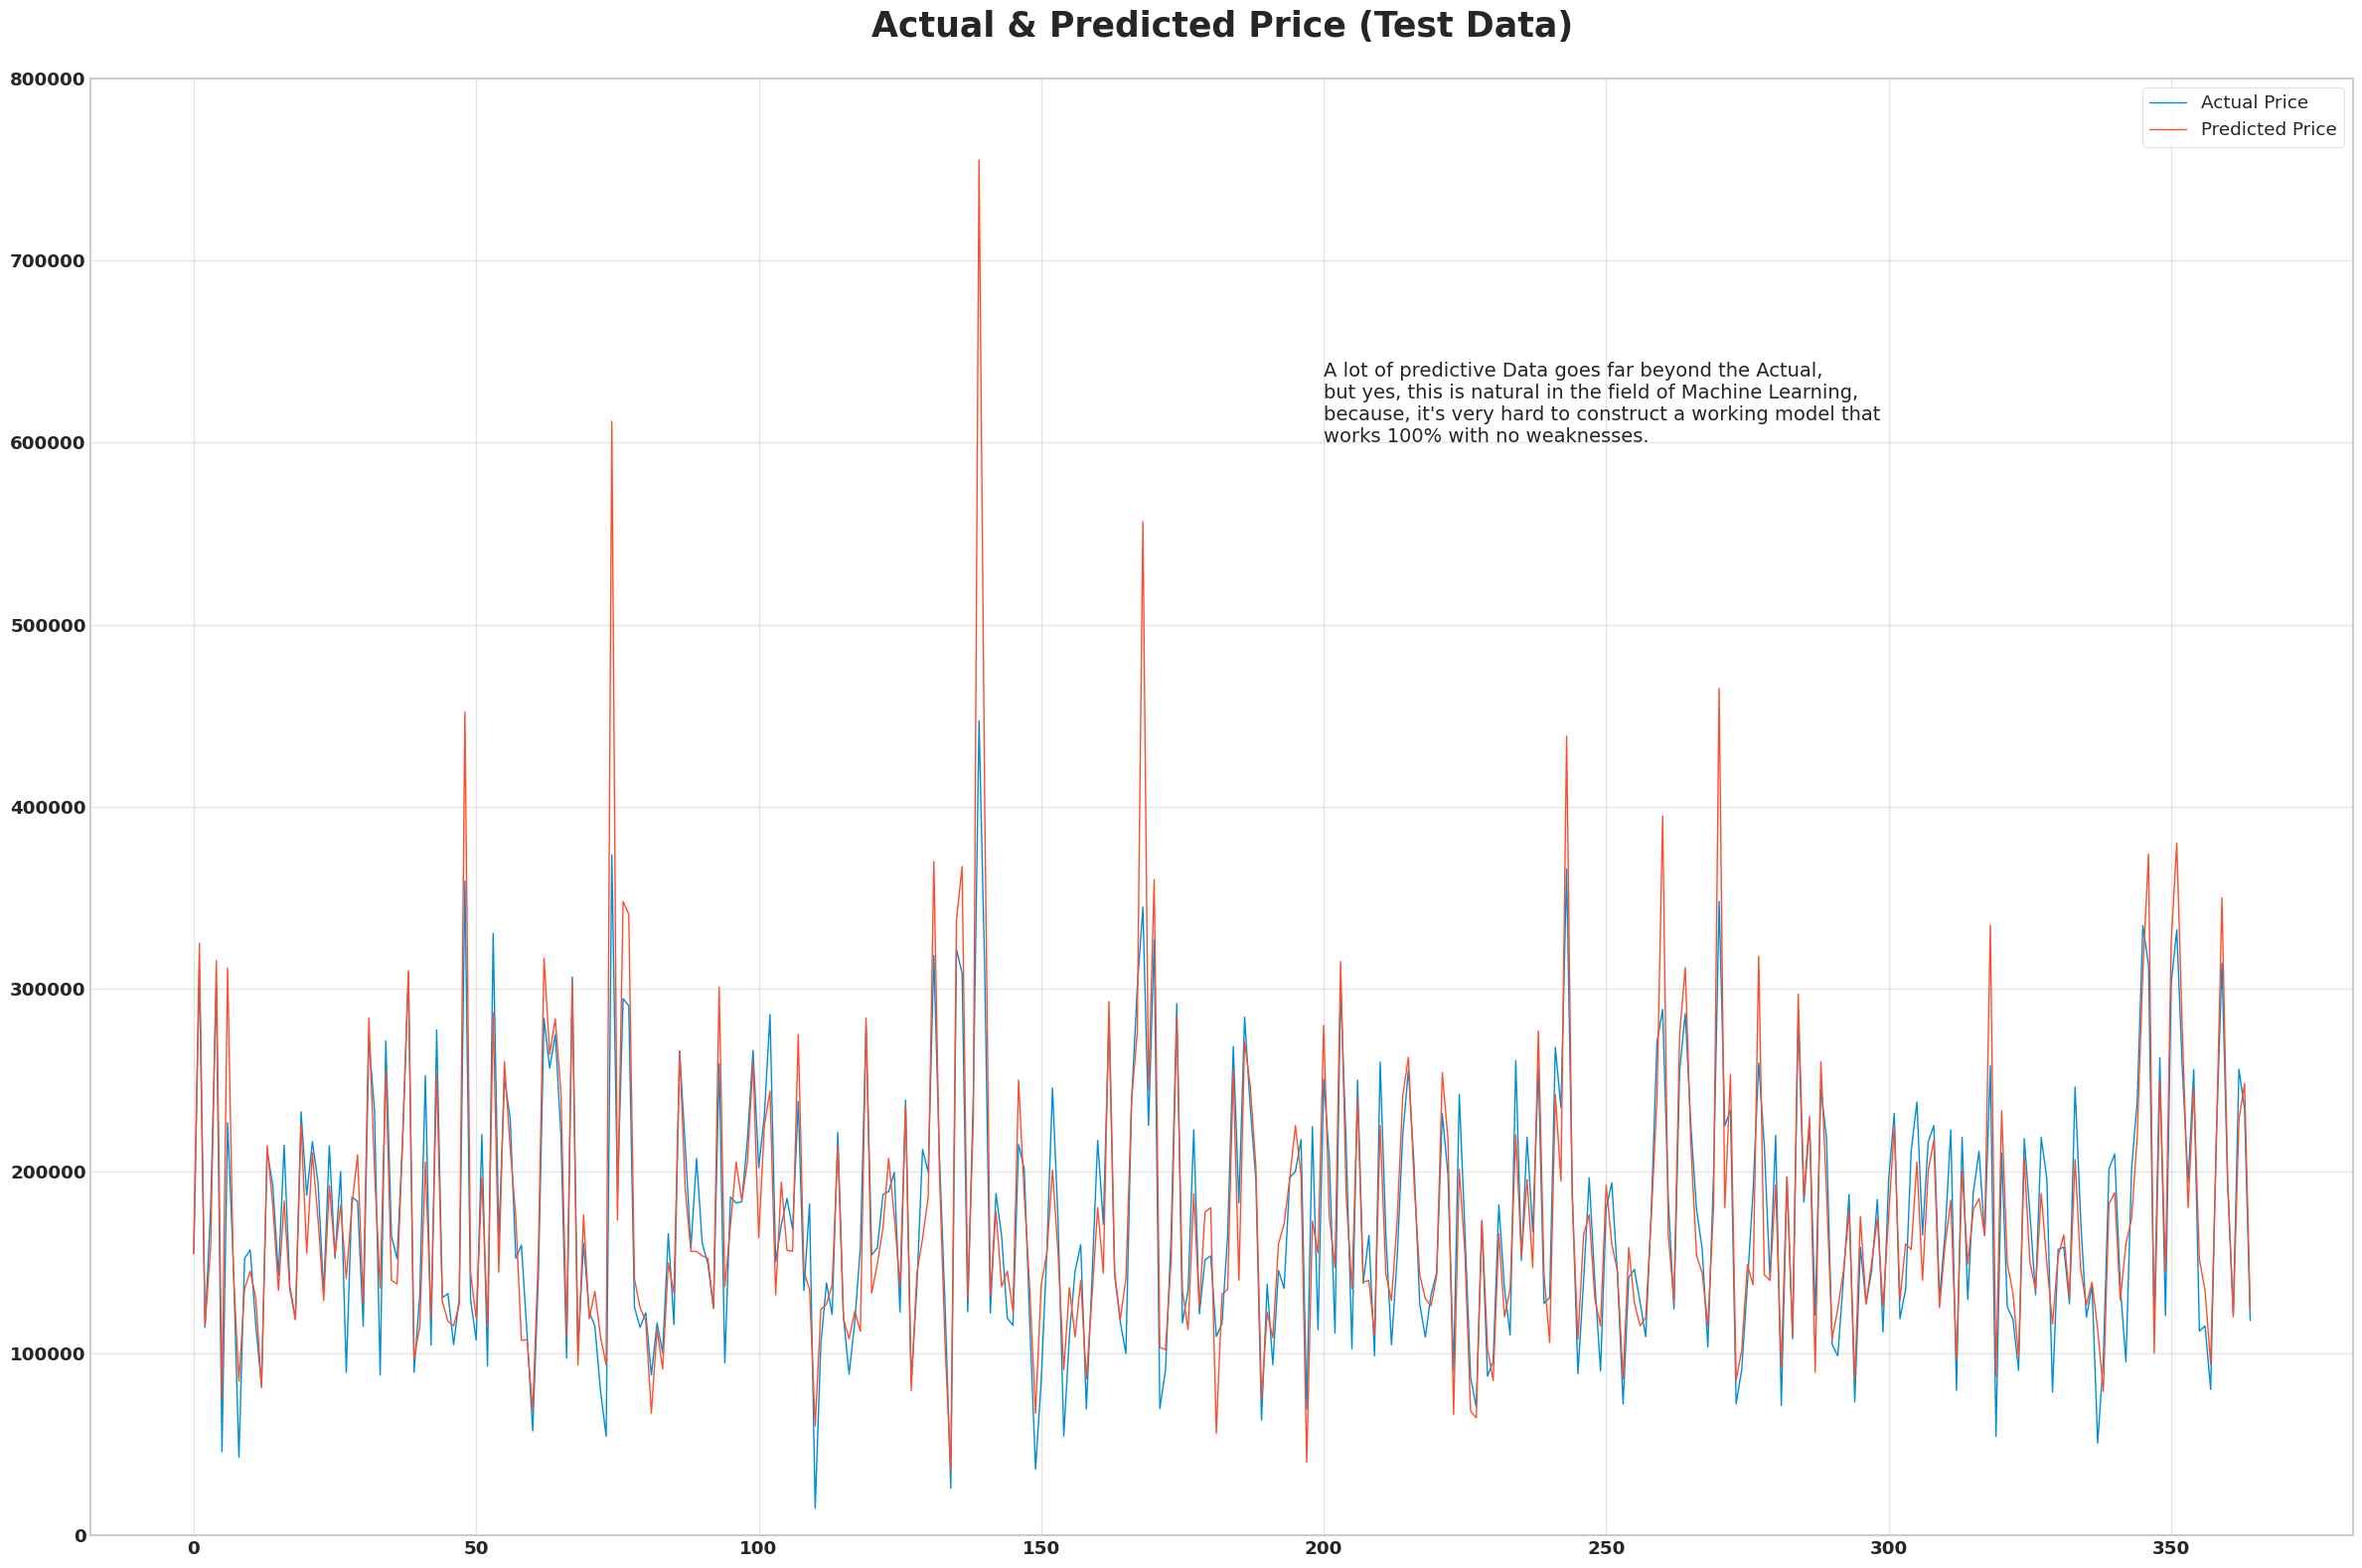

In [ ]:
test = pd.DataFrame({'Predicted Price':test_data, 'Actual Price':y_test})
fig = plt.figure(figsize=(24, 16))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test, linewidth=1)
plt.ylim(0, 800000)
plt.legend(['Actual Price','Predicted Price'])
plt.title('Actual & Predicted Price (Test Data)', weight="bold", fontsize=25, pad=30)
plt.annotate("A lot of predictive Data goes far beyond the Actual,\nbut yes, this is natural in the field of Machine Learning,\nbecause, it's very hard to construct a working model that\nworks 100% with no weaknesses.",
             xy=(200, 600000), xytext=(200, 600000))
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.show();

---

In [ ]:
train_r2_score = r2_score(y_train, train_data)
print(f'Train R2_score: {train_r2_score:.2f}')

train_mse = mean_absolute_error(y_train, train_data)
print(f'Train MSE : {train_mse:.2f}')

train_RMSE = mean_squared_error(y_train, train_data)
print(f'Train RMSE : {train_RMSE:.2f}')

Train R2_score: 0.80
Train MSE : 21353.49
Train RMSE : 1207860804.52


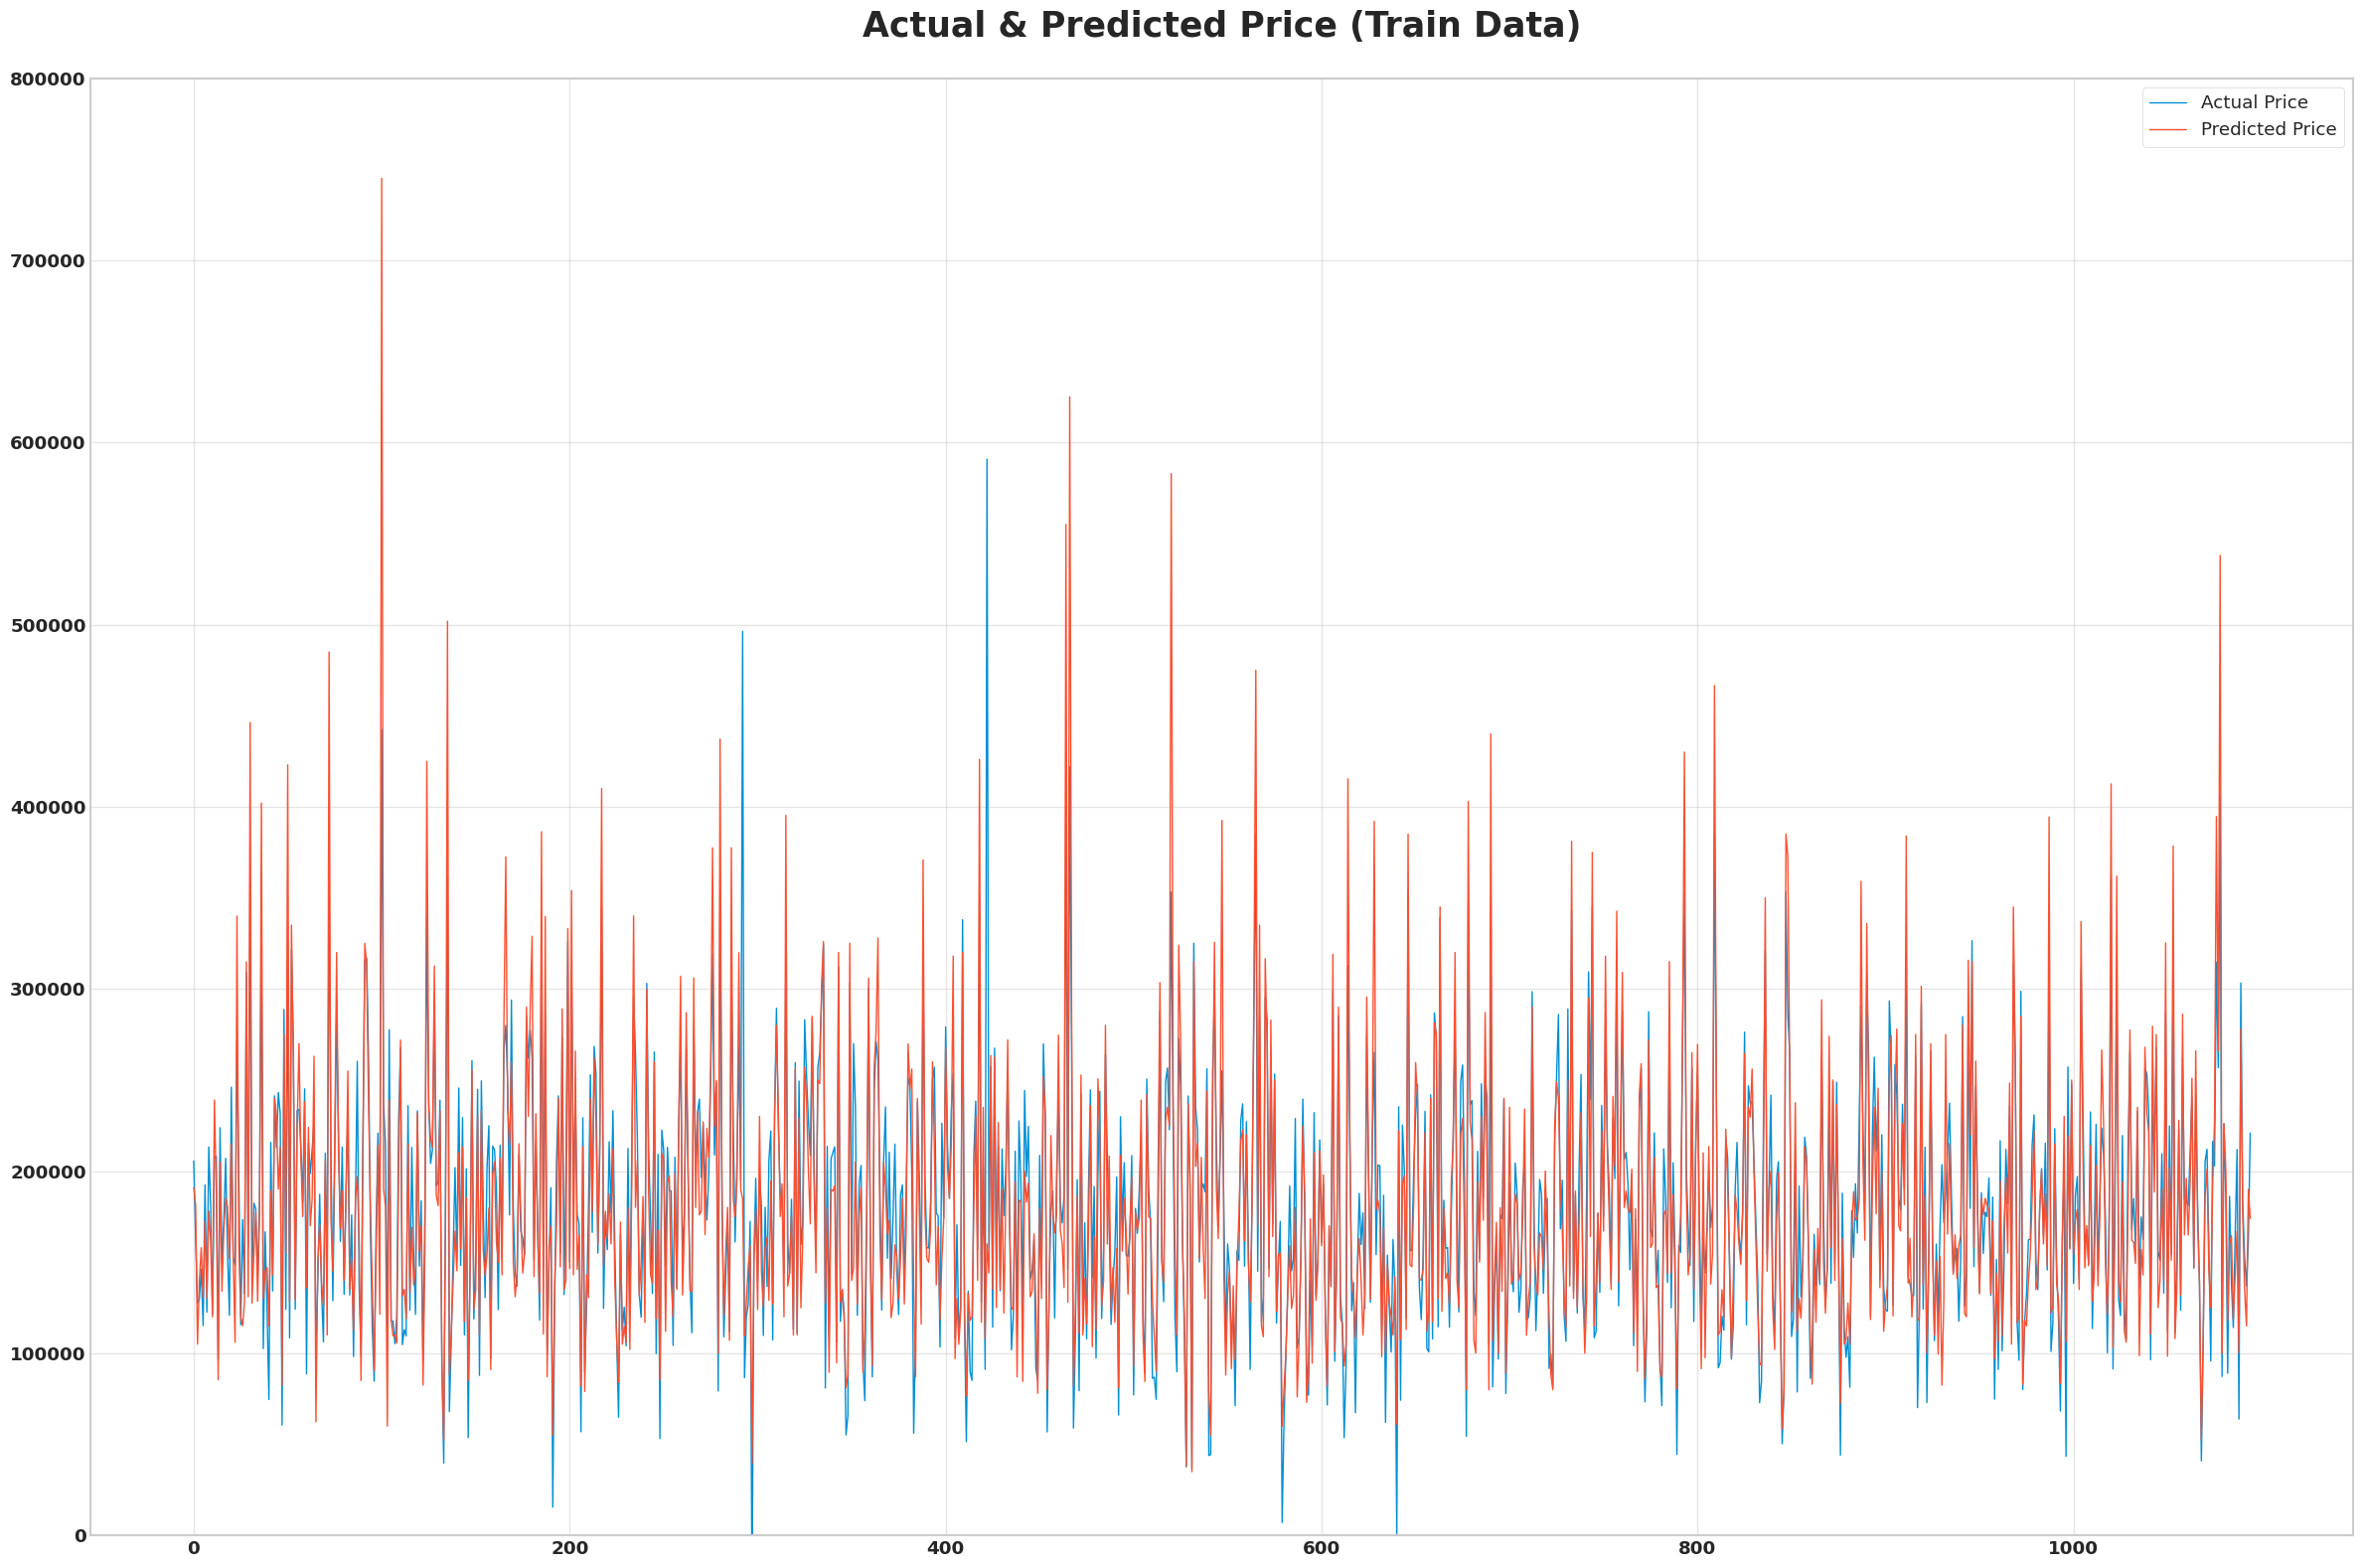

In [ ]:
train = pd.DataFrame({'Predicted Price':train_data, 'Actual Price':y_train})
fig= plt.figure(figsize=(24, 16))
train = train.reset_index()
train = train.drop(['index'],axis=1)
plt.plot(train, linewidth=1)
plt.ylim(0, 800000)
plt.legend(['Actual Price','Predicted Price'])
plt.title('Actual & Predicted Price (Train Data)', weight="bold", fontsize=25, pad=30)
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.show();

---